# Text-to-Image

AI image generation has become increasingly sophisticated, allowing us to create stunning visuals from text descriptions.
Spring-AI makes it easy to integrate this capability into Kotlin applications by providing a clean abstraction over various image generation models.
In this tutorial, we'll explore how to generate images using DALL-E 3 through Spring-AI.

Let's start by adding the necessary dependency:

In [1]:
@file:DependsOn("org.springframework.ai:spring-ai-openai-spring-boot-starter:1.0.0-M6")

Next, we need to set up our API key.
Make sure you have an OpenAI API key with access to DALL-E 3:

In [2]:
val apiKey = System.getenv("OPENAI_API_KEY") ?: "YOUR_OPENAI_API_KEY"

Now we can create our image generation components.
Spring-AI abstracts the complex details, allowing us to focus on the creative aspects:

In [3]:
import org.springframework.ai.image.ImagePrompt
import org.springframework.ai.openai.OpenAiImageModel
import org.springframework.ai.openai.OpenAiImageOptions
import org.springframework.ai.openai.api.OpenAiImageApi

// Create the API client
val openAiImageApi = OpenAiImageApi.builder().apiKey(apiKey).build()

// Configure generation options
val openAiImageOptions = OpenAiImageOptions.builder()
    .model(OpenAiImageApi.ImageModel.DALL_E_3.value)
    .quality("hd") // High-definition quality
    .height(1024) // 1024x1024 pixels
    .width(1024)
    .style("vivid") // More vibrant, contrasted style
    .build()

// Craft image prompt
val prompt = ImagePrompt(
    """A seamless blend of Art Nouveau and futuristic architecture in a coastal city, with organically flowing buildings made of sustainable materials, hanging gardens, and solar-collecting glass domes, detailed illustration
    """,
    openAiImageOptions
)

// Create the model and generate the image
val imageModel = OpenAiImageModel(openAiImageApi)
val aiResponse = imageModel.call(prompt)
aiResponse

ImageResponse [imageResponseMetadata=org.springframework.ai.image.ImageResponseMetadata@51c80fb9, imageGenerations=[ImageGeneration{imageGenerationMetadata=OpenAiImageGenerationMetadata{revisedPrompt='Imagine a harmonious fusion of Art Nouveau design and imagined, futuristic architecture. Visualize a coastal city where the buildings organically flow like water, resembling a cohesive balance between nature and construction. They are composed of sustainable materials that respect and enhance the environment. Adorning these structures are hanging gardens, creating a green cascade down the buildings. Capping the structures are solar-collecting glass domes, a testament to the city's commitment to sustainable energy. The sun glimmers on the city, creating a stunning visual play between light, glass, and greenery. The city represents the perfect balance between past, present, and future.'}, image=Image{url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-HxH5fxIrm2uwDEas71UvsRSe

The model returns metadata including a URL to the generated image.


To display it directly in our notebook, we'll need to download and render it.
Let's add the Ktor client to help with HTTP requests:

In [4]:
%use ktor-client

Now we can fetch and display the image:


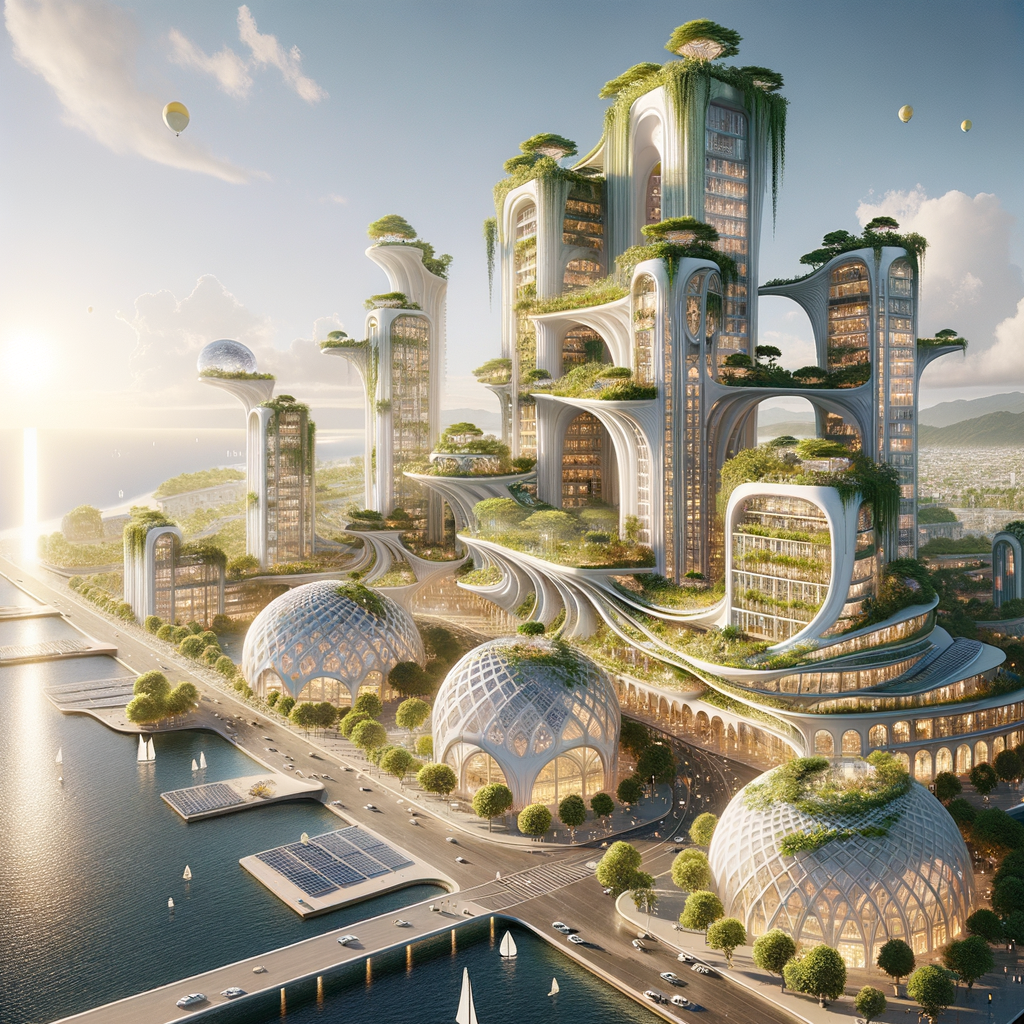

In [5]:
@file:OptIn(ExperimentalEncodingApi::class)

import kotlin.io.encoding.Base64
import kotlin.io.encoding.ExperimentalEncodingApi

// Fetch the image from the URL provided in the response
val httpResponse = http.get(aiResponse.result.output.url)
val imageBytes = httpResponse.body<ByteArray>()

// Encode the image as Base64 for inline display
val base64Image = Base64.encode(imageBytes)

// Display the image in the notebook
HTML("<img src='data:image/png;base64,$base64Image'/>")

This notebook demonstrates just how simple it is to integrate AI image generation into your Kotlin applications with Spring-AI. You can experiment with different prompts, styles, and parameters to create a wide range of images.